# Machine Learning and Statistics Project
> In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests

In [1]:
# Imported Necessary Libraries for Project
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import tensorflow as tf 
import tensorflow.keras as kr
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers

The first steps of this project will be to import the dataset and inspect the features of it. The dataset contains values for windspeed and power output for wind turbines. The goal of the project is to train a machine learning model to predict the power output of wind turbines based on windspeed.

In [2]:
# Imported dataset
raw_df = pd.read_csv('powerproduction.csv')

In [3]:
raw_df.shape

(500, 2)

In [4]:
raw_df.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


In [5]:
raw_df.head()

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [6]:
raw_df.tail()

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


The extreme values of the dataset make for interesting reading. The power output for the lowest and hisghest windspeeds are equal to zero. This may be due to error in measuring the power output or missing measurements. As such it will be import to factor this in when preparing the dataset for machine learning.

In [7]:
raw_df

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


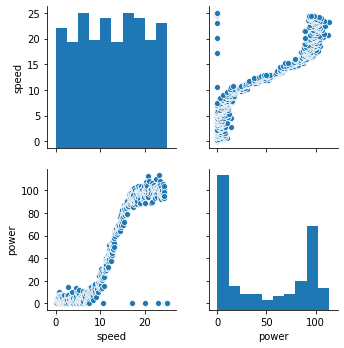

In [8]:
sns.pairplot(raw_df)
plt.show()

## Clean DataSet

To clean the dataset we first need to identify irregular data.

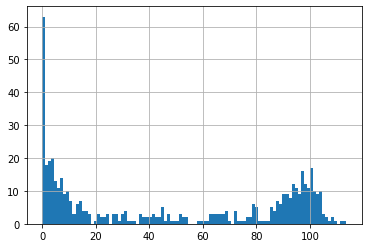

In [9]:
# https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
raw_df['power'].hist(bins=100)
plt.show()

As mentioned previously, the dataset contains a number of entries where the power output is equal to 0. This occurs at various intervals right throughout the dataset, as seen below. The first step will be to remove these erroneous entries.

In [10]:
raw_df.loc[raw_df['power'] == 0]

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
15,0.726,0.0
16,0.751,0.0
24,1.026,0.0
26,1.076,0.0
31,1.301,0.0


In [11]:
df = raw_df.copy()

In [12]:
df = df.loc[df['power'] != 0]
df

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


In [13]:
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


As we can now see, 49 entries throughout the dataset where power output is equal to zero have been removed. The next step will be to remove any duplicate entries in the dataset.

In [14]:
df.drop_duplicates(subset = ['power'], keep='last')

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
10,0.551,6.498
11,0.576,5.241
12,0.626,4.220
13,0.676,7.974
14,0.701,9.746


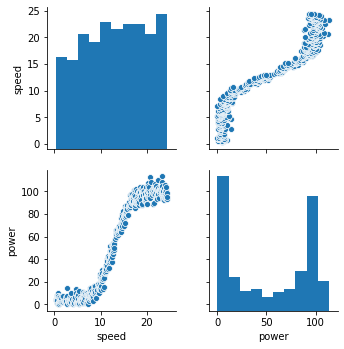

In [15]:
sns.pairplot(df)
plt.show()

## Training

## Keras

the dataset will first be split into a trainging set and a test set. The test set will be used in the final evaluation of the model. The code used for training the model is adapted from the [TensorFlow](https://www.tensorflow.org/tutorials/keras/regression) documentation available on tensorflow.org.

In [16]:
#https://www.tensorflow.org/tutorials/keras/regression
train_dataset = df.sample(frac=0.8, random_state=1)
test_dataset = df.drop(train_dataset.index)

In [17]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('power')
test_labels = test_features.pop('power')

In [18]:
# Normalisation
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
speed,13.000111,6.819504
power,52.978911,40.586800


As the windspeed and power output are measured on different scales it is importantant to normalise the data we use for machine learning. The feautures of the dataset will be multiplied by the weights used in the model and as such normalisation allows for consistency across the training set.

In [19]:
normalizer = preprocessing.Normalization()

In [20]:
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[13.000111]


In [21]:
speed = np.array(train_features['speed'])

speed_normalizer = preprocessing.Normalization(input_shape=[1,])
speed_normalizer.adapt(speed)

The density chosen for the layers was decided through trial and error, testing the loss and accuracy until this configuration was decided upon.

In [22]:
# Define the Model that will be used to train the dataset 
def build_and_compile_model(norm):
  model = kr.Sequential([
      norm,
      layers.Dense(64, activation='relu', input_shape=[1,]),
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='sigmoid'),
      layers.Dense(1)
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001),metrics=['mse'])
  return model

In [23]:
model = build_and_compile_model(speed_normalizer)

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 64)                128       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 8,516
Trainable params: 8,513
Non-trainable params: 3
_________________________________________________________________


In [25]:
#model.compile(
#    optimizer=tf.optimizers.Adam(learning_rate=0.1),
#    loss='mean_absolute_error', metrics='accuracy')

In [26]:
%%time
history = model.fit(
    train_features['speed'], train_labels,
    epochs=500,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)


Epoch 1/500
9/9 [==============================] - 1s 75ms/step - loss: 54.1305 - mse: 4571.1301 - val_loss: 49.8159 - val_mse: 3945.1472
Epoch 2/500
9/9 [==============================] - 0s 9ms/step - loss: 48.2548 - mse: 4021.8434 - val_loss: 49.4165 - val_mse: 3902.6392
Epoch 3/500
9/9 [==============================] - 0s 8ms/step - loss: 55.6003 - mse: 4760.6775 - val_loss: 48.9545 - val_mse: 3852.7256
Epoch 4/500
9/9 [==============================] - 0s 8ms/step - loss: 57.6000 - mse: 4950.2497 - val_loss: 48.3904 - val_mse: 3790.7114
Epoch 5/500
9/9 [==============================] - 0s 8ms/step - loss: 52.2284 - mse: 4361.1734 - val_loss: 47.6834 - val_mse: 3712.0894
Epoch 6/500
9/9 [==============================] - 0s 8ms/step - loss: 51.1278 - mse: 4216.8293 - val_loss: 46.8784 - val_mse: 3616.9482
Epoch 7/500
9/9 [==============================] - 0s 8ms/step - loss: 50.4636 - mse: 4146.4616 - val_loss: 46.0604 - val_mse: 3511.7581
Epoch 8/500
9/9 [=======================

9/9 [==============================] - 0s 8ms/step - loss: 22.4653 - mse: 985.1653 - val_loss: 19.5000 - val_mse: 802.4667
Epoch 120/500
9/9 [==============================] - 0s 8ms/step - loss: 22.4988 - mse: 972.8009 - val_loss: 19.3743 - val_mse: 790.8055
Epoch 121/500
9/9 [==============================] - 0s 8ms/step - loss: 23.5021 - mse: 1026.4380 - val_loss: 19.3095 - val_mse: 779.8515
Epoch 122/500
9/9 [==============================] - 0s 8ms/step - loss: 21.9114 - mse: 923.6157 - val_loss: 19.0911 - val_mse: 767.6199
Epoch 123/500
9/9 [==============================] - 0s 8ms/step - loss: 23.0736 - mse: 996.1568 - val_loss: 19.0404 - val_mse: 757.2760
Epoch 124/500
9/9 [==============================] - 0s 15ms/step - loss: 22.3869 - mse: 959.5753 - val_loss: 18.8147 - val_mse: 744.6836
Epoch 125/500
9/9 [==============================] - 0s 8ms/step - loss: 23.7276 - mse: 1014.3782 - val_loss: 18.7083 - val_mse: 733.6105
Epoch 126/500
9/9 [==============================] -

Epoch 179/500
9/9 [==============================] - 0s 8ms/step - loss: 13.4659 - mse: 348.6720 - val_loss: 11.2645 - val_mse: 262.3996
Epoch 180/500
9/9 [==============================] - 0s 8ms/step - loss: 13.7015 - mse: 360.4469 - val_loss: 11.0673 - val_mse: 255.5927
Epoch 181/500
9/9 [==============================] - 0s 16ms/step - loss: 11.8854 - mse: 288.2640 - val_loss: 10.9203 - val_mse: 249.6348
Epoch 182/500
9/9 [==============================] - 0s 9ms/step - loss: 12.8987 - mse: 327.8426 - val_loss: 10.8307 - val_mse: 244.4798
Epoch 183/500
9/9 [==============================] - 0s 9ms/step - loss: 12.5196 - mse: 315.7407 - val_loss: 10.7595 - val_mse: 239.3564
Epoch 184/500
9/9 [==============================] - 0s 8ms/step - loss: 12.0204 - mse: 295.8147 - val_loss: 10.6297 - val_mse: 233.8553
Epoch 185/500
9/9 [==============================] - 0s 8ms/step - loss: 12.5669 - mse: 299.5880 - val_loss: 10.5614 - val_mse: 229.0262
Epoch 186/500
9/9 [=====================

9/9 [==============================] - 0s 8ms/step - loss: 3.0858 - mse: 16.7293 - val_loss: 3.4025 - val_mse: 17.7758
Epoch 301/500
9/9 [==============================] - 0s 8ms/step - loss: 3.3487 - mse: 17.5851 - val_loss: 3.4128 - val_mse: 18.2064
Epoch 302/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0647 - mse: 16.1762 - val_loss: 3.3086 - val_mse: 16.7120
Epoch 303/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0912 - mse: 16.1932 - val_loss: 3.5208 - val_mse: 19.5465
Epoch 304/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0102 - mse: 15.2166 - val_loss: 3.2744 - val_mse: 16.3389
Epoch 305/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1182 - mse: 15.7109 - val_loss: 3.3130 - val_mse: 17.2382
Epoch 306/500
9/9 [==============================] - 0s 8ms/step - loss: 3.2027 - mse: 15.9557 - val_loss: 3.4174 - val_mse: 18.5111
Epoch 307/500
9/9 [==============================] - 0s 15ms/step - loss: 3.1218 - 

9/9 [==============================] - 0s 8ms/step - loss: 3.0442 - mse: 15.5720 - val_loss: 3.4040 - val_mse: 18.6530
Epoch 423/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0892 - mse: 15.9387 - val_loss: 3.4692 - val_mse: 19.2962
Epoch 424/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1119 - mse: 16.5253 - val_loss: 3.4799 - val_mse: 19.3445
Epoch 425/500
9/9 [==============================] - 0s 8ms/step - loss: 2.7572 - mse: 12.8285 - val_loss: 3.4053 - val_mse: 18.4795
Epoch 426/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0300 - mse: 16.7307 - val_loss: 3.4629 - val_mse: 19.2192
Epoch 427/500
9/9 [==============================] - 0s 8ms/step - loss: 3.0059 - mse: 15.1645 - val_loss: 3.3907 - val_mse: 18.6571
Epoch 428/500
9/9 [==============================] - 0s 8ms/step - loss: 3.1220 - mse: 16.8320 - val_loss: 3.4706 - val_mse: 19.2245
Epoch 429/500
9/9 [==============================] - 0s 9ms/step - loss: 2.9964 - m

In [27]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [POWER]')
  plt.legend()
  plt.grid(True)

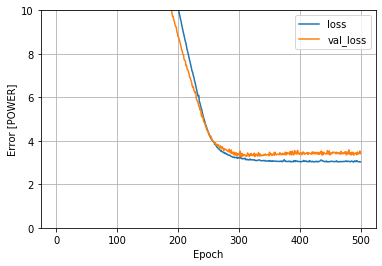

In [28]:
plot_loss(history)

The loss and value loss reduced significantly throughout testing, ultimately landing on value of around 3 from a starting value of around 54 in the first epoch.

In [29]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,val_loss,val_mse,epoch
495,3.042133,15.729972,3.381653,18.506126,495
496,3.032934,15.513036,3.424233,18.813957,496
497,3.033747,15.590892,3.433266,19.008759,497
498,3.048088,15.732693,3.530753,19.923548,498
499,3.030872,15.586796,3.408952,18.815790,499


In [30]:
# generated 450 values, same as the original dataset, between 0 and 25 for prediction
x = tf.linspace(0.0, 25, 450)
y = model.predict(x)

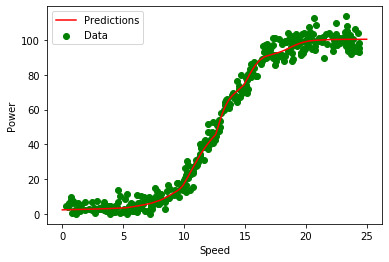

In [31]:
def plot_speed(x, y):
  plt.scatter(train_features['speed'], train_labels,  c='green',  label='Data')
  plt.plot(x, y, 'r', label='Predictions')
  plt.xlabel('Speed')
  plt.ylabel('Power')
  plt.legend()

plot_speed(x,y)

This graph demonstrates that the predictions made by the model correspond closely with the original dataset. This give a strong decree of confidence with the model created for this purpose.

In [34]:
model.save("model.h5")

# References 
- https://towardsdatascience.com/data-cleaning-in-python-the-ultimate-guide-2020-c63b88bf0a0d
- https://www.tensorflow.org/tutorials/keras/regression
- https://learnonline.gmit.ie/course/view.php?id=1121